## Läs in fil och spara det i olika variabler 
ändra column namn 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Läs in filerna
df_svenska = pd.read_excel("visualiseringar\\riket2023_åk9_np (1).xlsx", skiprows=8, sheet_name="Svenska")
df_engelska = pd.read_excel("visualiseringar\\riket2023_åk9_np (1).xlsx", skiprows=8, sheet_name="Engelska")
df_matematik = pd.read_excel("visualiseringar\\riket2023_åk9_np (1).xlsx", skiprows=8, sheet_name="Matematik")
df_sva = pd.read_excel("visualiseringar\\riket2023_åk9_np (1).xlsx", skiprows=8, sheet_name="Svenska som andraspråk")

# Byt kolumnnamn så de blir lättare att förstå
columns = ["Plats", "Huvudman", "Totalt_A_F", "Flickor_A_F", "Pojkar_A_F",
           "Totalt_A_E", "Flickor_A_E", "Pojkar_A_E", "Totalt_poäng", "Flickor_poäng", "Pojkar_poäng"]

df_svenska.columns = columns
df_engelska.columns = columns
df_matematik.columns = columns
df_sva.columns = columns 

# Konverterar "Totalt_poäng" till numeriska värden och med errors="coerce" gör att tomma ställen blir till NaN så man undviker error
df_svenska["Totalt_poäng"] = pd.to_numeric(df_svenska["Totalt_poäng"], errors="coerce")
df_engelska["Totalt_poäng"] = pd.to_numeric(df_engelska["Totalt_poäng"], errors="coerce")
df_matematik["Totalt_poäng"] = pd.to_numeric(df_matematik["Totalt_poäng"], errors="coerce")
df_sva["Totalt_poäng"] = pd.to_numeric(df_sva["Totalt_poäng"], errors="coerce")



C:\Users\salih\AppData\Local\Temp\ipykernel_8928\4202851604.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(df_svenska["Huvudman"], rotation = 45)
C:\Users\salih\AppData\Local\Temp\ipykernel_8928\4202851604.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(df_engelska["Huvudman"], rotation=45)
C:\Users\salih\AppData\Local\Temp\ipykernel_8928\4202851604.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(df_matematik["Huvudman"], rotation=45)
C:\Users\salih\AppData\Local\Temp\ipykernel_8928\4202851604.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_x

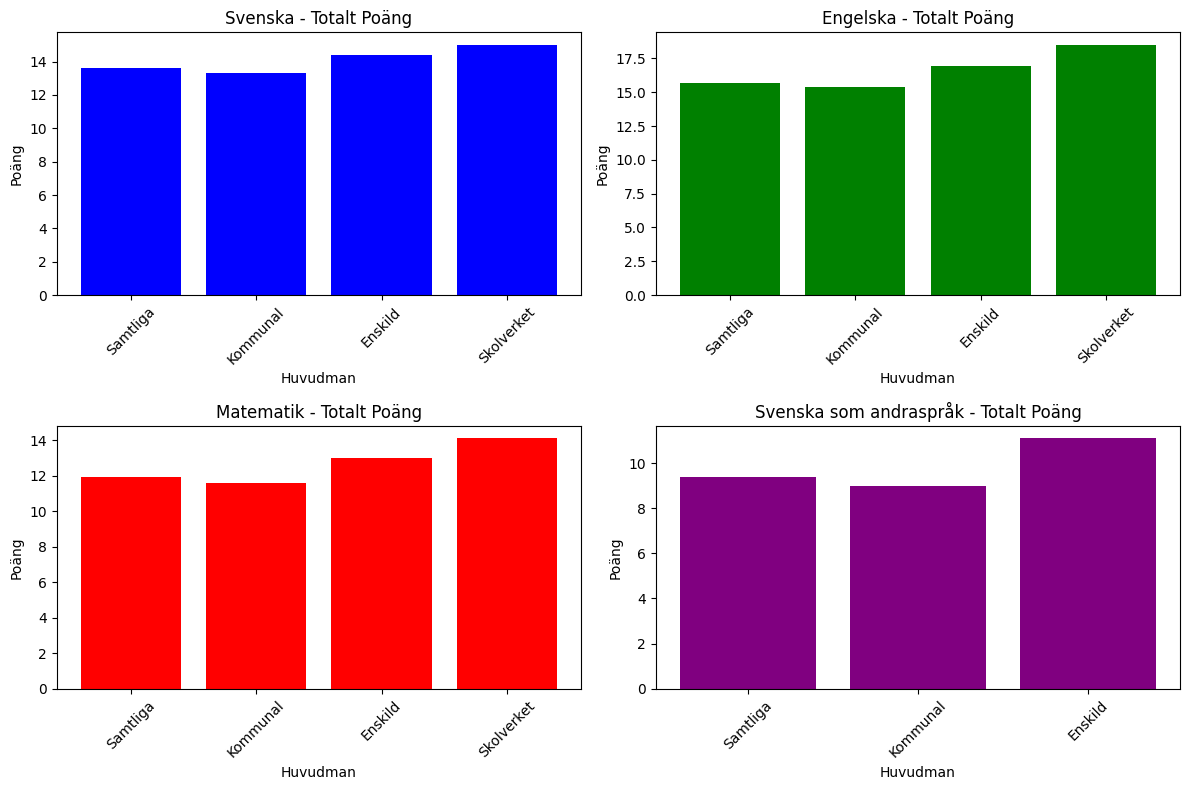

In [12]:

# Skapar en 2x2 subplot för alla ämnen 
fig, axes = plt.subplots(2, 2, figsize = (12,8))

# Svenska tabelen
axes[0, 0].bar(df_svenska["Huvudman"], df_svenska["Totalt_poäng"], color ="blue")
axes[0, 0].set_title("Svenska - Totalt Poäng")
axes[0, 0].set_xlabel("Huvudman")
axes[0, 0].set_ylabel("Poäng")
axes[0, 0].set_xticklabels(df_svenska["Huvudman"], rotation = 45)

# Engelska tabelen
axes[0, 1].bar(df_engelska["Huvudman"], df_engelska["Totalt_poäng"], color='green')
axes[0, 1].set_title("Engelska - Totalt Poäng")
axes[0, 1].set_xlabel("Huvudman")
axes[0, 1].set_ylabel("Poäng")
axes[0, 1].set_xticklabels(df_engelska["Huvudman"], rotation=45)

# Matematik tabelen
axes[1, 0].bar(df_matematik["Huvudman"], df_matematik["Totalt_poäng"], color='red')
axes[1, 0].set_title("Matematik - Totalt Poäng")
axes[1, 0].set_xlabel("Huvudman")
axes[1, 0].set_ylabel("Poäng")
axes[1, 0].set_xticklabels(df_matematik["Huvudman"], rotation=45)

# Svenska som andraspråk tabelen
axes[1, 1].bar(df_sva["Huvudman"], df_sva["Totalt_poäng"], color='purple')
axes[1, 1].set_title("Svenska som andraspråk - Totalt Poäng")
axes[1, 1].set_xlabel("Huvudman")
axes[1, 1].set_ylabel("Poäng")
axes[1, 1].set_xticklabels(df_sva["Huvudman"], rotation=45)

plt.tight_layout()
plt.savefig("visualiseringar/np_totalt_poäng.png")  # Sparar bilden
plt.show()

In [13]:
import plotly.express as px

#Läser in bety_o_prov_riksnivå filen 

df_betyg = pd.read_excel("visualiseringar\\betyg_o_prov_riksnivå (1).xlsx", sheet_name="Tabell 1B", skiprows=7)

#Lägger till nya column namn
columns2 = ["Läsår", "Totalt Meritvärde 16 ämnen", "Flickor(Meritvärde)", "Pojkar(Meritvärde)", "Totalt","Flickor", "Pojkar", "Totalt Ej Godkänt", "Flickor(ig)", "Pojkar(ig)"]

df_betyg.columns = columns2

# Extraherar relevant data för flickor och pojkar med ej godkänt 
df_betyg_ejgodkänt = df_betyg[["Läsår", "Totalt Ej Godkänt", "Flickor(ig)", "Pojkar(ig)"]]

# Tar de 5 första raderna så det blir rätt år tal
df_betyg_ejgodkänt_3_år = df_betyg_ejgodkänt.head(5)

# Skapar linjediagrammet
fig2 = px.line(df_betyg_ejgodkänt_3_år, x="Läsår", y=["Totalt Ej Godkänt", "Flickor(ig)", "Pojkar(ig)"],
               title="Andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23",
               markers=True)
fig2.write_html("visualiseringar\\graf_andel_elever_saknar_godkänt_betyg_18_23.html")
fig2.show()

In [14]:
# Extraherar relevant data meritvärde för flickor och pojkar 
df_betyg_meritvärde = df_betyg[["Läsår", "Totalt Meritvärde 16 ämnen", "Flickor(Meritvärde)", "Pojkar(Meritvärde)"]]

df_betyg_meritvärde = df_betyg_meritvärde.head(5)

fig2 = px.line(df_betyg_meritvärde, x="Läsår", y=["Totalt Meritvärde 16 ämnen", "Flickor(Meritvärde)", "Pojkar(Meritvärde)"],
               title="meritvärde beräknat på 16 ämnen År 18-23 ",
               markers=True)
fig2.write_html("visualiseringar\\graf_meritvärde_beräknat_på_16_ämnen_18_23.html")
fig2.show()

In [ ]:
#Extraherar relevant data meritvärde för flickor och pojkar

df_betyg_meritvärde = df_betyg[["Läsår", "Totalt Meritvärde 16 ämnen", "Flickor(Meritvärde)", "Pojkar(Meritvärde)"]]

df_betyg_meritvärde = df_betyg_meritvärde.head(5)

#Skapar linjediagram för meritvärde beräknat på 16 ämnen År 18-23 
fig2 = px.line(df_betyg_meritvärde, x="Läsår", y=["Totalt Meritvärde 16 ämnen", "Flickor(Meritvärde)", "Pojkar(Meritvärde)"],
               title="meritvärde beräknat på 16 ämnen År 18-23 ",
               markers=True)
fig2.write_html("visualiseringar\\graf_meritvärde_beräknat_på_16_ämnen_18_23.html")
fig2.show()


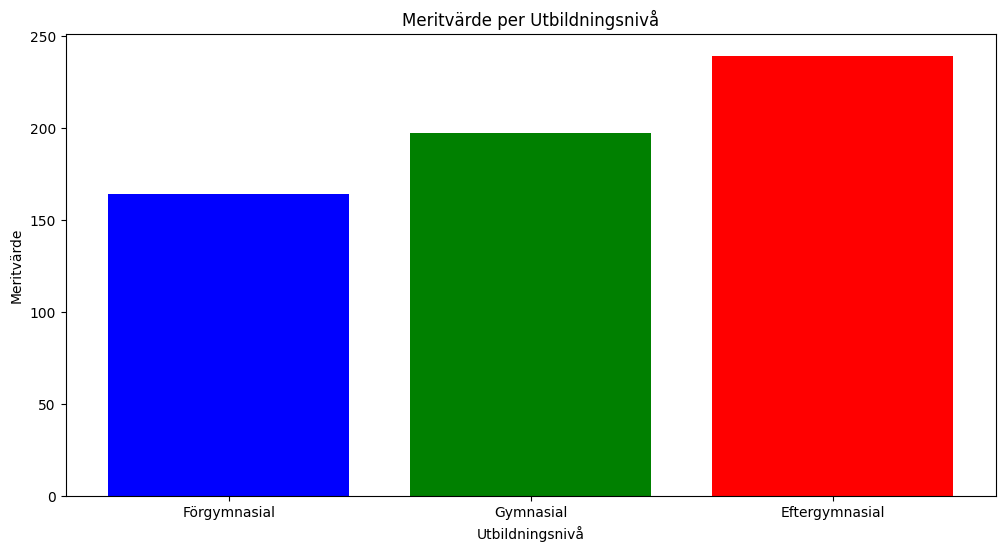

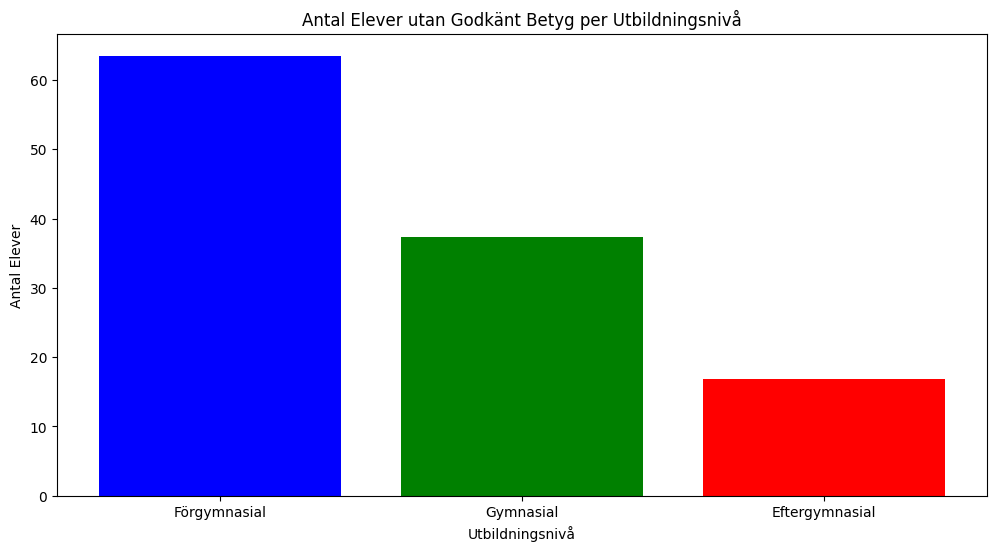

In [36]:
# Filtrera data för olika elver där deras föreldrar pluggat dessa utbildningsnivåer 
förgymnasial = df_betyg[df_betyg["Läsår"] == "Förgymnasial utbildning"]
gymnasial = df_betyg[df_betyg["Läsår"] == "Gymnasial utbildning"]
eftergymnasial = df_betyg[df_betyg["Läsår"] == "Eftergymnasial utbildning"]

# Hämtar relevant data för meritvärden
förgymnasial_merit = förgymnasial["Totalt Meritvärde 16 ämnen"].iloc[0]
gymnasial_merit = gymnasial["Totalt Meritvärde 16 ämnen"].iloc[0]
eftergymnasial_merit = eftergymnasial["Totalt Meritvärde 16 ämnen"].iloc[0]

# Hämtar data för Totalt ej godkänt
förgymnasial_ej_godkänt = förgymnasial["Totalt Ej Godkänt"].iloc[0]
gymnasial_ej_godkänt = gymnasial["Totalt Ej Godkänt"].iloc[0]
eftergymnasial_ej_godkänt = eftergymnasial["Totalt Ej Godkänt"].iloc[0]

# Skapar stapeldiagram för meritvärde
plt.figure(figsize=(12, 6))
plt.bar(["Förgymnasial", "Gymnasial", "Eftergymnasial"],
        [förgymnasial_merit, gymnasial_merit, eftergymnasial_merit], 
        color=['blue', 'green', 'red'])
plt.title("Meritvärde per Utbildningsnivå")
plt.xlabel("Utbildningsnivå")
plt.ylabel("Meritvärde")
plt.show()

# Skapar stapeldiagram för antal elever utan godkänt betyg
plt.figure(figsize=(12, 6))
plt.bar(["Förgymnasial", "Gymnasial", "Eftergymnasial"],
        [förgymnasial_ej_godkänt, gymnasial_ej_godkänt, eftergymnasial_ej_godkänt], 
        color=['blue', 'green', 'red'])
plt.title("Antal Elever utan Godkänt Betyg per Utbildningsnivå")
plt.xlabel("Utbildningsnivå")
plt.ylabel("Antal Elever")
plt.show()